In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.tsa.seasonal import seasonal_decompose,STL
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams
from   datetime                        import  datetime,timedelta
from math import sqrt
from   IPython.display                 import  display
from   pylab                           import  rcParams 
from   datetime                        import  datetime, timedelta
from statsmodels.tsa.stattools         import  adfuller
from statsmodels.tsa.stattools         import  pacf
from statsmodels.tsa.stattools         import  acf
from statsmodels.graphics.tsaplots     import  plot_pacf
from statsmodels.graphics.tsaplots     import  plot_acf
from statsmodels.graphics.gofplots     import qqplot
from statsmodels.tsa.seasonal          import seasonal_decompose
from statsmodels.tsa.arima_model       import  ARMA
from statsmodels.tsa.arima_model          import  ARIMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
import warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [56]:
df=pd.read_csv('C:\\Users\\Dell\\Downloads\\Excel\\train (2).csv',parse_dates=['Month'],index_col='Month')
df.head()

,Avg_sunspot_count
Month,
1749-01-01,97
1749-02-01,104
1749-03-01,117
1749-04-01,93
1749-05-01,142


In [57]:
df.tail()

,Avg_sunspot_count
Month,
2010-08-01,30
2010-09-01,36
2010-10-01,34
2010-11-01,34
2010-12-01,25


In [58]:
df.shape

(3144, 1)

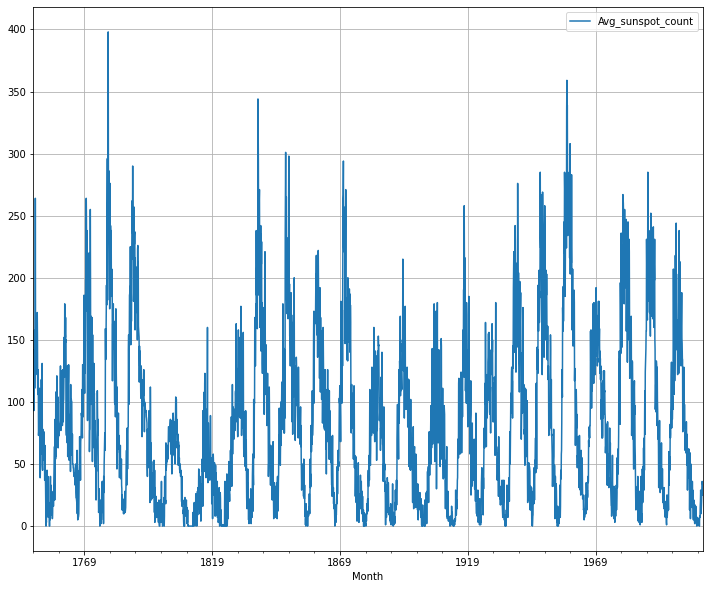

In [59]:
#plot the train data
df.plot(figsize=(12,10),grid=True)

In [60]:
#checking for the null values
df.isnull().sum()
#There is no null values in the data

Avg_sunspot_count    0
dtype: int64

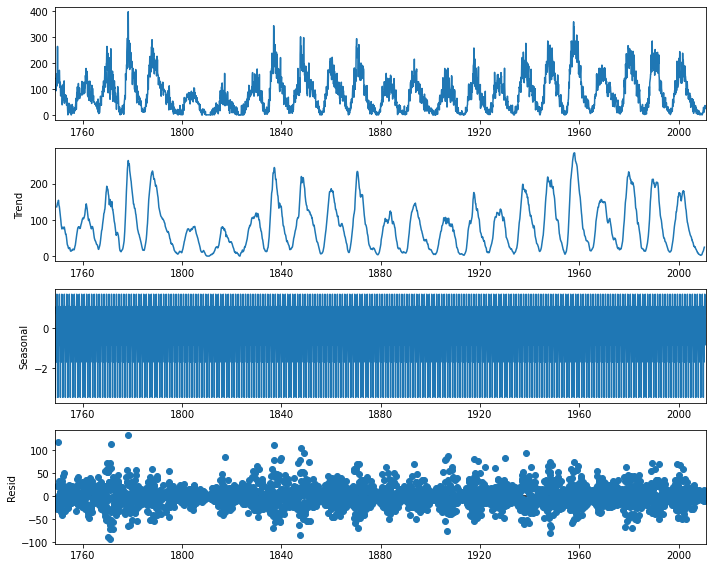

In [61]:
#Decomposition of Additive model

rcParams['figure.figsize'] = 10,8
decomp=seasonal_decompose(df,model='additive')
decomp.plot();
#It is having only seasonality not trend
#error represent that datapoints having little bit high variance

In [62]:
df['Avg_sunspot_count'].value_counts()

0      81
13     40
7      39
1      39
14     36
       ..
308     1
334     1
398     1
189     1
359     1
Name: Avg_sunspot_count, Length: 288, dtype: int64

In [63]:
df['Avg_sunspot_count']=df['Avg_sunspot_count'].replace(0,'0.01')

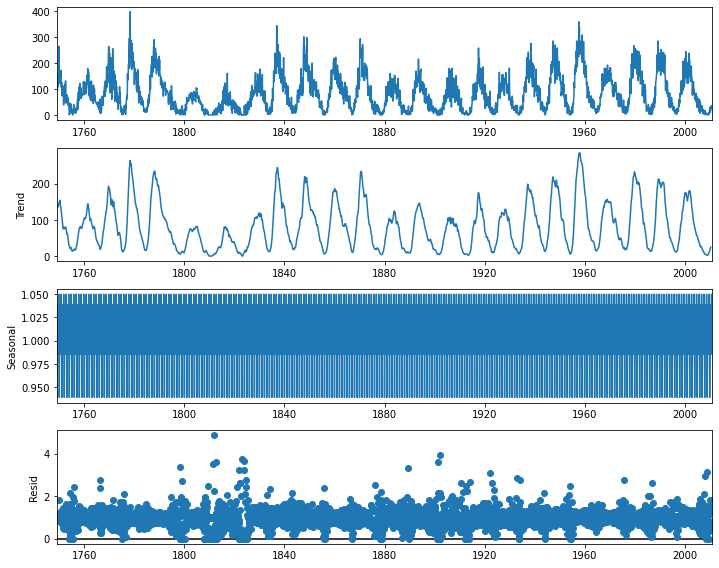

In [53]:
#Decomposition of multiplicative model

rcParams['figure.figsize'] = 10,8
decomp=seasonal_decompose(df,model='multiplicative')
decomp.plot();
#multiplicative model doesnt allow the 0 or negative value

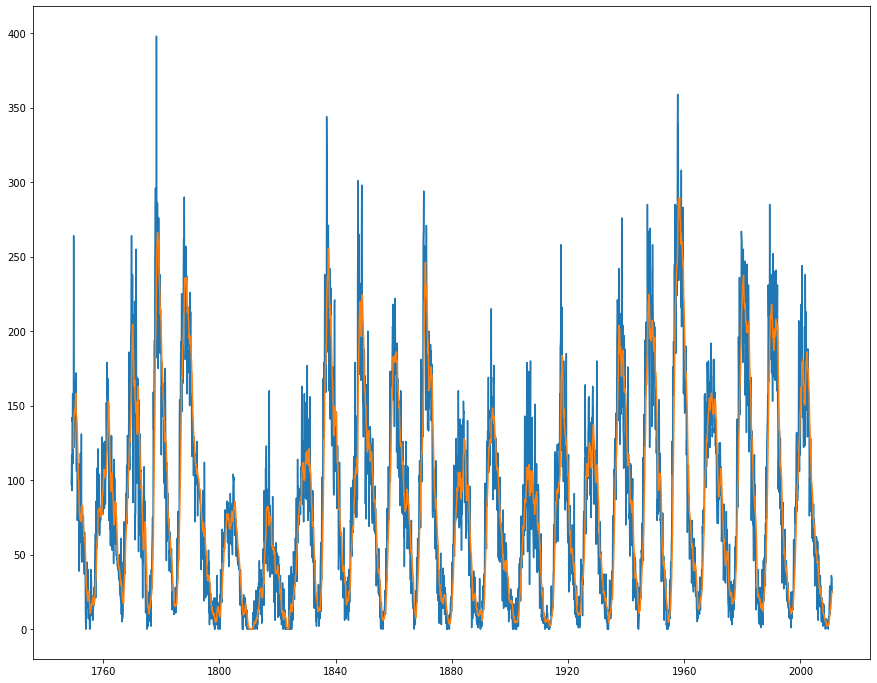

In [12]:
#Moving Average
#understand the stock moments in a simple way,update the value by average
plt.figure(figsize=(15,12))
plt.plot(df,label='AvgSunspotCount')
plt.plot(df.rolling(10).mean(),label='Moving Average')
plt.show()

In [13]:
#checking for the stationary or not
observation=df.values
test_result=adfuller(observation)

In [14]:
print('ADF Statistic: %f' % test_result[0])
print('p-value: %f' % test_result[1])
#here pvalue is less than 0.05 it is a stationary problem

ADF Statistic: -10.390321
p-value: 0.000000


In [15]:
#split the data
train_end=datetime(1990,12,31)
test_end=datetime(2010,12,31)

In [16]:
train = df[:train_end] 
test = df[train_end + timedelta(days=1):test_end]

In [17]:
print('Train')
display(train)
print('Test')
display(test)

Train


,Avg_sunspot_count
Month,
1749-01-01,97.0
1749-02-01,104.0
1749-03-01,117.0
1749-04-01,93.0
1749-05-01,142.0
...,...
1990-08-01,252.0
1990-09-01,169.0
1990-10-01,199.0


Test


,Avg_sunspot_count
Month,
1991-01-01,195.0
1991-02-01,240.0
1991-03-01,197.0
1991-04-01,198.0
1991-05-01,167.0
...,...
2010-08-01,30.0
2010-09-01,36.0
2010-10-01,34.0


# Exponential smoothnening

In [51]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES = model_TES.fit(optimized=True)
model_TES.summary()

Dep. Variable:,Avg_sunspot_count,No. Observations:,2904
Model:,ExponentialSmoothing,SSE,2014979.286
Optimized:,True,AIC,19030.767
Trend:,Additive,BIC,19126.348
Seasonal:,Additive,AICC,19031.004
Seasonal Periods:,12,Date:,"Fri, 07 May 2021"
Box-Cox:,False,Time:,10:17:00
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5066451,alpha,True
smoothing_trend,0.0317290,beta,True


In [48]:
TES_predictions =  model_TES.forecast(len(test))

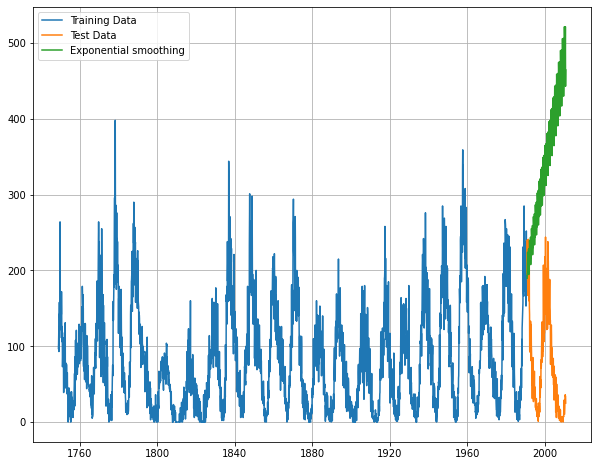

In [49]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,TES_predictions,label='Exponential smoothing')
plt.legend(loc='best')
plt.grid();

In [50]:
print(mean_squared_error(test.values,TES_predictions.values,squared=False))

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

print(MAPE(test['Avg_sunspot_count'].values,TES_predictions.values))
 

300.93602935404635
42813.78898401706


# Triple exponential smoothing

In [22]:
model_triple_exponential = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
model_triple_exponential = model_triple_exponential.fit(optimized=True)
model_triple_exponential.summary()

Dep. Variable:,Avg_sunspot_count,No. Observations:,2904
Model:,ExponentialSmoothing,SSE,2014979.286
Optimized:,True,AIC,19030.767
Trend:,Additive,BIC,19126.348
Seasonal:,Additive,AICC,19031.004
Seasonal Periods:,12,Date:,"Fri, 07 May 2021"
Box-Cox:,False,Time:,09:45:39
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5066451,alpha,True
smoothing_trend,0.0317290,beta,True


In [23]:
model_triple_predict =  model_triple_exponential.forecast(len(test))

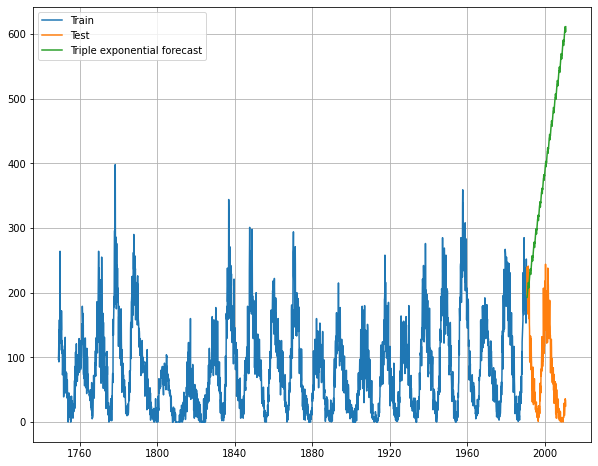

In [24]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(model_triple_predict, label='Triple exponential forecast')
plt.legend(loc='best')
plt.grid()

In [25]:
print(mean_squared_error(test.values,model_triple_predict.values,squared=False))

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

print(MAPE(test['Avg_sunspot_count'].values,model_triple_predict.values))
 

364.9017623954104
51959.85435770435


# Acf and Pacf

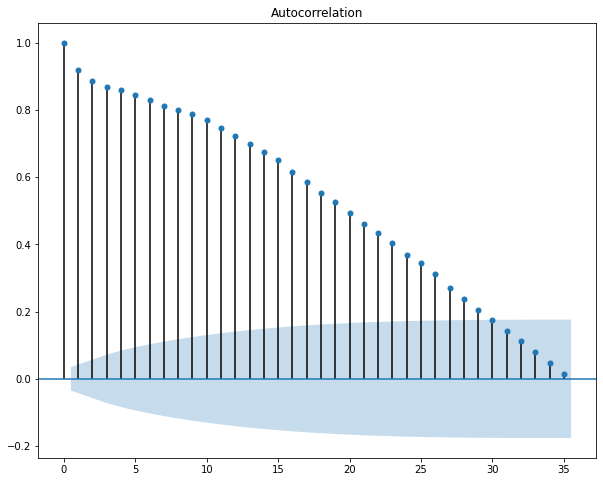

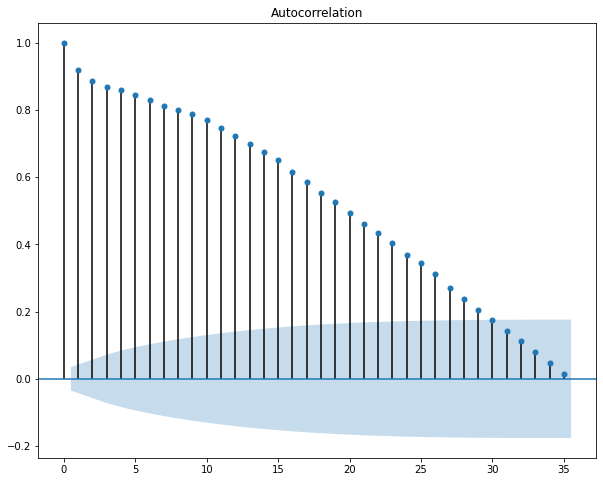

In [26]:
plot_acf(df) 

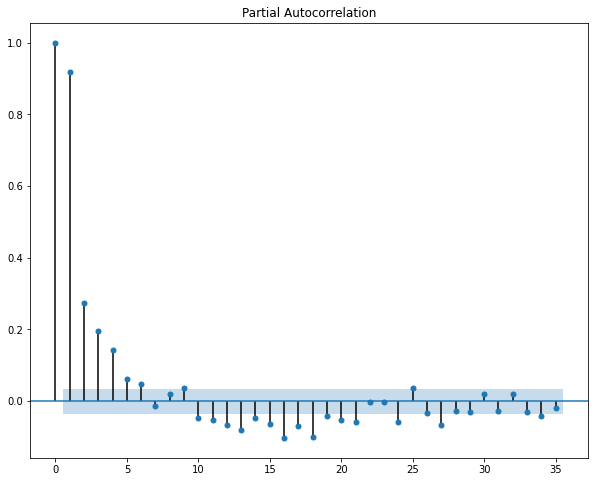

In [27]:
plot_pacf(df);

In [75]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(train, lags=1)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:      Avg_sunspot_count   No. Observations:                 2904
Model:                     AutoReg(1)   Log Likelihood              -13733.955
Method:               Conditional MLE   S.D. of innovations             27.440
Date:                Fri, 07 May 2021   AIC                              6.626
Time:                        10:50:35   BIC                              6.632
Sample:                    02-01-1749   HQIC                             6.628
                         - 12-01-1990                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept                6.9839      0.803      8.699      0.000       5.410       8.557
Avg_sunspot_count.L1     0.9167      0.007    123.276      0.000       0.902       0.931
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0908           +0.0000j            1.0908            0.0000
-----------------------------------------------------------------------------
"""

In [76]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [77]:
predictions=model_fit.predict(start=pred_start, end=pred_end)
predictions

1991-01-01    187.580091
1991-02-01    178.944560
1991-03-01    171.028092
1991-04-01    163.770813
1991-05-01    157.117833
                 ...    
2010-08-01     83.872453
2010-09-01     83.872453
2010-10-01     83.872453
2010-11-01     83.872453
2010-12-01     83.872453
Freq: MS, Length: 240, dtype: float64

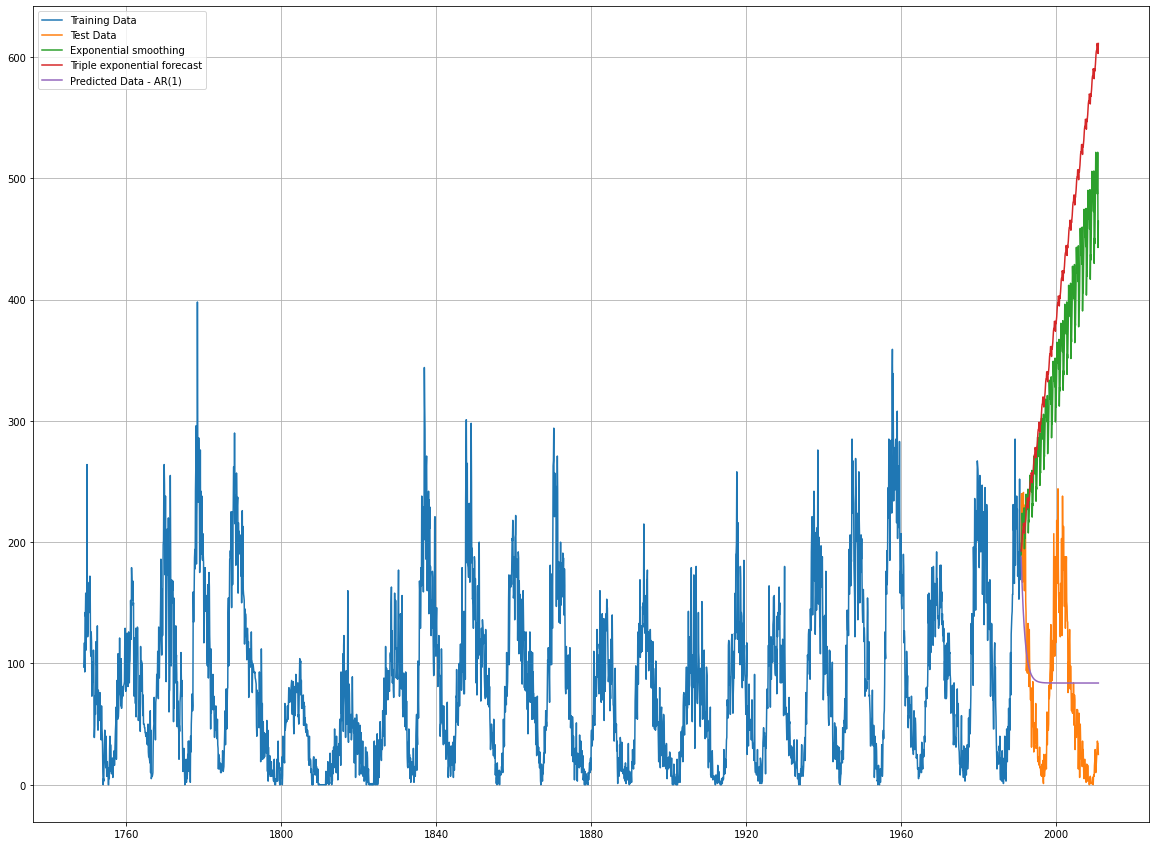

In [78]:
plt.figure(figsize=(20,15))
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,TES_predictions,label='Exponential smoothing')
plt.plot(model_triple_predict, label='Triple exponential forecast')
plt.plot(test.index,predictions,label='Predicted Data - AR(1)')
plt.legend(loc='best')
plt.grid();

In [79]:
print(mean_squared_error(test.values,predictions.values,squared=False))

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

print(MAPE(test['Avg_sunspot_count'].values,predictions.values))
 

62.506142099175804
7546.424138860569


# ARMA

In [80]:
model1=ARMA(train,(2,30)).fit()
print(model1.summary())

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [34]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [35]:
predictions=model1.predict(start=pred_start, end=pred_end)
predictions

1991-01-01    188.136631
1991-02-01    181.414069
1991-03-01    178.258382
1991-04-01    174.940239
1991-05-01    171.471060
                 ...    
2010-08-01     88.735182
2010-09-01     88.995436
2010-10-01     89.236178
2010-11-01     89.457240
2010-12-01     89.658505
Freq: MS, Length: 240, dtype: float64

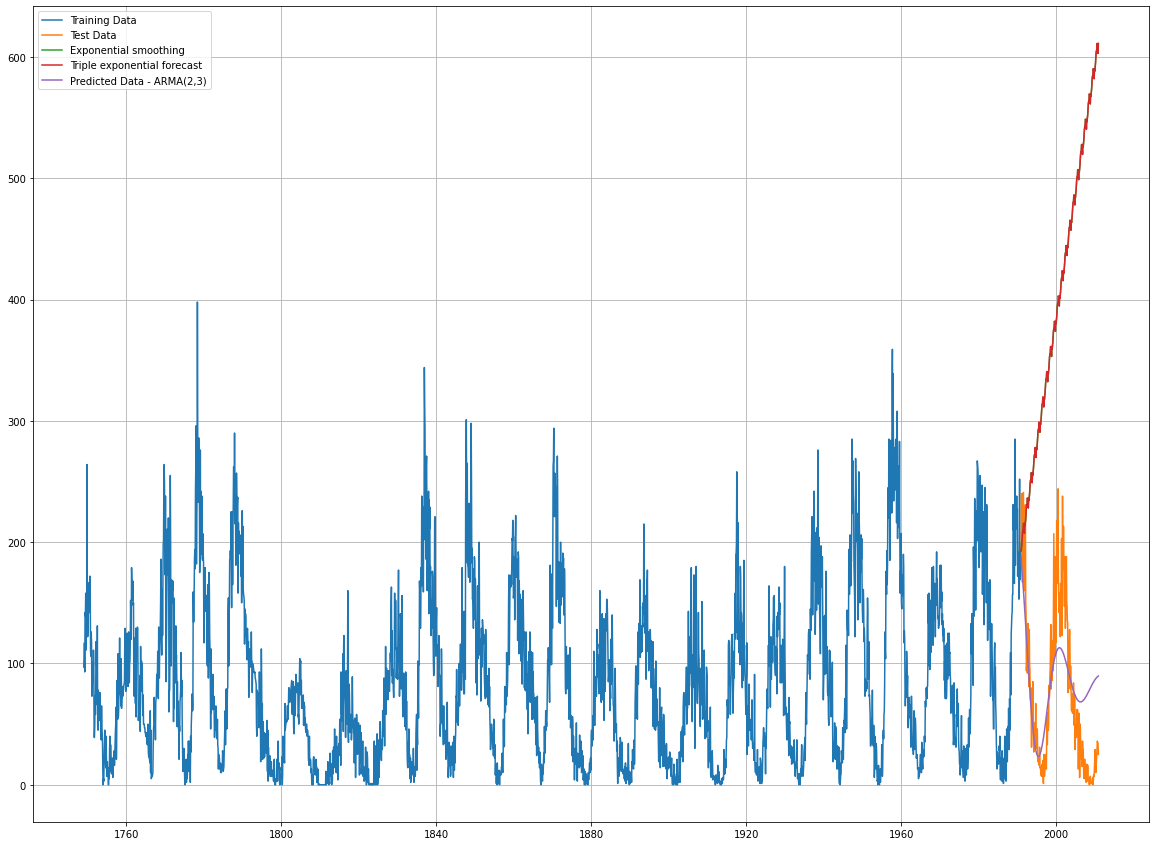

In [36]:
plt.figure(figsize=(20,15))
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,TES_predictions,label='Exponential smoothing')
plt.plot(model_triple_predict, label='Triple exponential forecast')
plt.plot(test.index,predictions,label='Predicted Data - ARMA(2,3)')
plt.legend(loc='best')
plt.grid();

In [37]:
print(mean_squared_error(test.values,predictions.values,squared=False))

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

print(MAPE(test['Avg_sunspot_count'].values,predictions.values))
 

47.77453378484743
7211.282353289832


In [38]:
#Train on entire data

model=ARMA(df,(2,3)).fit()
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:      Avg_sunspot_count   No. Observations:                 3144
Model:                     ARMA(2, 3)   Log Likelihood              -14557.552
Method:                       css-mle   S.D. of innovations             24.800
Date:                Fri, 07 May 2021   AIC                          29129.104
Time:                        09:46:09   BIC                          29171.477
Sample:                    01-01-1749   HQIC                         29144.309
                         - 12-01-2010                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      83.0223      4.286     19.373      0.000      74.623      91.422
ar.L1.Avg_sunspot_count     1.9774      0.005    419.434      0.000       1.968       1.987


In [39]:
fore10=model.predict(start=test.index[-1],end=test.index[-1]+
                                pd.DateOffset(months=119),dynamic=True)
fore10

2010-12-01    39.373224
2011-01-01    43.084995
2011-02-01    46.067531
2011-03-01    49.076150
2011-04-01    52.103283
                ...    
2020-07-01    62.195884
2020-08-01    62.498814
2020-09-01    62.843643
2020-10-01    63.228715
2020-11-01    63.652313
Freq: MS, Length: 120, dtype: float64

In [40]:
final=pd.DataFrame(fore10)
final

,0
2010-12-01,39.373224
2011-01-01,43.084995
2011-02-01,46.067531
2011-03-01,49.076150
2011-04-01,52.103283
...,...
2020-07-01,62.195884
2020-08-01,62.498814
2020-09-01,62.843643
2020-10-01,63.228715


In [41]:
re=pd.read_csv('C:\\Users\\Dell\\Downloads\\sample_submission.csv')
re.head()

,Month,Avg_sunspot_count
0,01-01-2011,27
1,02-01-2011,48
2,03-01-2011,79
3,04-01-2011,100
4,05-01-2011,100


In [42]:
len(re)

120

In [43]:
re["AvgSunspotCount"]=fore10.values
re.head()

,Month,Avg_sunspot_count,AvgSunspotCount
0,01-01-2011,27,39.373224
1,02-01-2011,48,43.084995
2,03-01-2011,79,46.067531
3,04-01-2011,100,49.076150
4,05-01-2011,100,52.103283


In [44]:
re=re.drop('Avg_sunspot_count',1)

In [45]:
re.head()

,Month,AvgSunspotCount
0,01-01-2011,39.373224
1,02-01-2011,43.084995
2,03-01-2011,46.067531
3,04-01-2011,49.076150
4,05-01-2011,52.103283


In [46]:
re.to_csv("final1.csv",index=False)

# ARIMA

In [33]:
import itertools
p = q = range(0, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('parameter combinations for the Model')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

parameter combinations for the Model
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [34]:
result = pd.DataFrame(columns=['param', 'AIC'])
result

,param,AIC


In [35]:
for param in pdq:
            try:
                mod = ARIMA(train, order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                result = result.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

ARIMA(0, 1, 0) - AIC:27594.65819845707
ARIMA(0, 1, 1) - AIC:27140.266932910123
ARIMA(0, 1, 2) - AIC:27096.69974453497
ARIMA(0, 1, 3) - AIC:27098.596920161446
ARIMA(0, 1, 4) - AIC:27096.360957154568
ARIMA(1, 1, 0) - AIC:27311.664451388075
ARIMA(1, 1, 1) - AIC:27099.726985264268
ARIMA(1, 1, 2) - AIC:27098.636841642514
ARIMA(1, 1, 3) - AIC:27099.277836153004
ARIMA(1, 1, 4) - AIC:27036.17068866998
ARIMA(2, 1, 0) - AIC:27185.200938114245
ARIMA(2, 1, 1) - AIC:27097.31318267234
ARIMA(2, 1, 2) - AIC:27025.970510992982
ARIMA(2, 1, 3) - AIC:27024.44597358963
ARIMA(2, 1, 4) - AIC:27024.06403020327
ARIMA(3, 1, 0) - AIC:27121.823537137916
ARIMA(3, 1, 1) - AIC:27096.03832033829
ARIMA(3, 1, 2) - AIC:27101.166619414053
ARIMA(3, 1, 3) - AIC:27029.83728623806
ARIMA(3, 1, 4) - AIC:27027.4804074369
ARIMA(4, 1, 0) - AIC:27104.92231795748
ARIMA(4, 1, 1) - AIC:27097.712075888503
ARIMA(4, 1, 2) - AIC:27025.141849207346
ARIMA(4, 1, 3) - AIC:27028.141884735353
ARIMA(4, 1, 4) - AIC:27020.55830146239


In [36]:
result.sort_values(by=['AIC'])

,param,AIC
24,"(4, 1, 4)",27020.558301
14,"(2, 1, 4)",27024.064030
13,"(2, 1, 3)",27024.445974
22,"(4, 1, 2)",27025.141849
12,"(2, 1, 2)",27025.970511
19,"(3, 1, 4)",27027.480407
23,"(4, 1, 3)",27028.141885
18,"(3, 1, 3)",27029.837286
9,"(1, 1, 4)",27036.170689
16,"(3, 1, 1)",27096.038320


In [37]:
model = ARIMA(train, order=(4,1,4))
results_Arima = model.fit()
print(results_Arima.summary())

                              ARIMA Model Results                              
Dep. Variable:     D.Avg_sunspot_count   No. Observations:                 2903
Model:                  ARIMA(4, 1, 4)   Log Likelihood              -13500.279
Method:                        css-mle   S.D. of innovations             25.315
Date:                 Thu, 25 Mar 2021   AIC                          27020.558
Time:                         17:14:56   BIC                          27080.293
Sample:                     02-01-1749   HQIC                         27042.081
                          - 12-01-1990                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0362      0.362      0.100      0.920      -0.674       0.747
ar.L1.D.Avg_sunspot_count    -0.0568      0.043     -1.332      0.183      -0.

In [38]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [39]:
ARIMA_predictions=results_Arima.predict(start=pred_start, end=pred_end)
ARIMA_predictions

1991-01-01   -5.881093
1991-02-01   -3.642203
1991-03-01   -5.402200
1991-04-01    2.057663
1991-05-01   -3.443483
                ...   
2010-08-01    0.036808
2010-09-01    0.035750
2010-10-01    0.036380
2010-11-01    0.036502
2010-12-01    0.035751
Freq: MS, Length: 240, dtype: float64

In [40]:
ARIMA_pred=ARIMA_predictions.cumsum()
ARIMA_pred

1991-01-01    -5.881093
1991-02-01    -9.523296
1991-03-01   -14.925496
1991-04-01   -12.867833
1991-05-01   -16.311316
                ...    
2010-08-01   -19.094362
2010-09-01   -19.058612
2010-10-01   -19.022233
2010-11-01   -18.985731
2010-12-01   -18.949980
Freq: MS, Length: 240, dtype: float64

In [41]:
ARIMA_pred=pd.DataFrame(ARIMA_pred,columns=train.columns)

In [42]:
arima_predict = ARIMA_pred.copy()
columns = train.columns
for col in columns:        
        arima_predict[str(col)+'_forecast'] = train[col].iloc[-1] + arima_predict[str(col)]

In [43]:
arima_predict.head()

,Avg_sunspot_count,Avg_sunspot_count_forecast
1991-01-01,-5.881093,191.118907
1991-02-01,-9.523296,187.476704
1991-03-01,-14.925496,182.074504
1991-04-01,-12.867833,184.132167
1991-05-01,-16.311316,180.688684


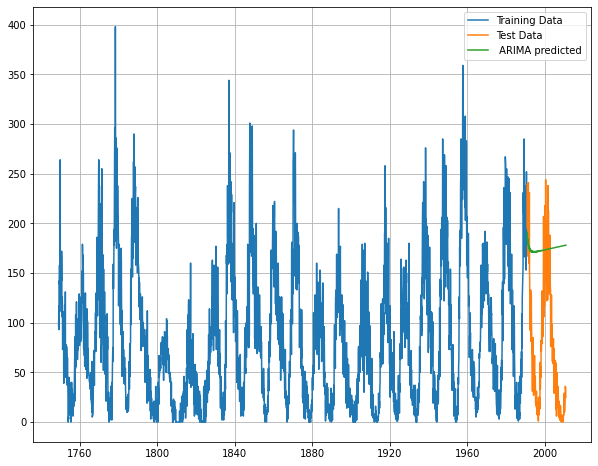

In [44]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,arima_predict['Avg_sunspot_count_forecast'],label=' ARIMA predicted')
plt.legend(loc='best')
plt.grid();

In [47]:
print('mean square error',mean_squared_error(test.values,arima_predict['Avg_sunspot_count_forecast'].values,squared=False))

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

print('MAPE :',MAPE(test['Avg_sunspot_count'].values,arima_predict['Avg_sunspot_count_forecast'].values))
 

mean square error 118.40554792244049
MAPE : 15990.05899726059


In [48]:
import itertools
p = range(0,2)
q = range(0, 2)
d= range(0,2)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2],7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 7)
Model: (0, 0, 1)(0, 1, 0, 7)
Model: (0, 1, 0)(0, 1, 1, 7)
Model: (0, 1, 0)(1, 0, 0, 7)


In [49]:
dfObj2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj2

,param,seasonal,AIC


In [ ]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj2 = dfObj2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 7)7 - AIC:35425.27516172255
SARIMA(0, 0, 0)x(0, 0, 1, 7)7 - AIC:33015.75863889966
SARIMA(0, 0, 0)x(0, 1, 0, 7)7 - AIC:29892.196100570818
SARIMA(0, 0, 0)x(0, 1, 1, 7)7 - AIC:29772.379364190158
SARIMA(0, 0, 0)x(1, 0, 0, 7)7 - AIC:29797.337673129812
SARIMA(0, 0, 0)x(1, 0, 1, 7)7 - AIC:29770.134872067953
SARIMA(0, 0, 0)x(1, 1, 0, 7)7 - AIC:29767.225257952443
SARIMA(0, 0, 0)x(1, 1, 1, 7)7 - AIC:29714.41329883581
SARIMA(0, 0, 0)x(2, 0, 0, 7)7 - AIC:29685.18210525635
SARIMA(0, 0, 0)x(2, 0, 1, 7)7 - AIC:29642.21345117605
SARIMA(0, 0, 0)x(2, 1, 0, 7)7 - AIC:29592.25698219044
SARIMA(0, 0, 0)x(2, 1, 1, 7)7 - AIC:29585.835215300598
SARIMA(0, 0, 0)x(3, 0, 0, 7)7 - AIC:29460.805205026994
SARIMA(0, 0, 0)x(3, 0, 1, 7)7 - AIC:29431.670575486147
SARIMA(0, 0, 0)x(3, 1, 0, 7)7 - AIC:29497.302597117305
SARIMA(0, 0, 0)x(3, 1, 1, 7)7 - AIC:29499.21713246261
SARIMA(0, 0, 1)x(0, 0, 0, 7)7 - AIC:32558.271845178268
SARIMA(0, 0, 1)x(0, 0, 1, 7)7 - AIC:31075.684614688256
SARIMA(0, 0, 1)x(

SARIMA(2, 0, 1)x(1, 1, 0, 7)7 - AIC:27887.084002809042
SARIMA(2, 0, 1)x(1, 1, 1, 7)7 - AIC:26958.665506654237
SARIMA(2, 0, 1)x(2, 0, 0, 7)7 - AIC:26917.38571224956
SARIMA(2, 0, 1)x(2, 0, 1, 7)7 - AIC:26920.224607784206
SARIMA(2, 0, 1)x(2, 1, 0, 7)7 - AIC:27593.902906454714
SARIMA(2, 0, 1)x(2, 1, 1, 7)7 - AIC:26886.228626224278
SARIMA(2, 0, 1)x(3, 0, 0, 7)7 - AIC:26854.221603113743
SARIMA(2, 0, 1)x(3, 0, 1, 7)7 - AIC:26848.811745411018
SARIMA(2, 0, 1)x(3, 1, 0, 7)7 - AIC:27400.803086023883
SARIMA(2, 0, 1)x(3, 1, 1, 7)7 - AIC:26819.441544853922
SARIMA(2, 1, 0)x(0, 0, 0, 7)7 - AIC:27165.916617082745
SARIMA(2, 1, 0)x(0, 0, 1, 7)7 - AIC:27110.362003330527
SARIMA(2, 1, 0)x(0, 1, 0, 7)7 - AIC:29148.87445096425
SARIMA(2, 1, 0)x(0, 1, 1, 7)7 - AIC:27060.636351112727
SARIMA(2, 1, 0)x(1, 0, 0, 7)7 - AIC:27101.607079310765
SARIMA(2, 1, 0)x(1, 0, 1, 7)7 - AIC:27089.075605053476
SARIMA(2, 1, 0)x(1, 1, 0, 7)7 - AIC:28126.449676363492
SARIMA(2, 1, 0)x(1, 1, 1, 7)7 - AIC:27053.507018891138
SARIMA(2, 1,

In [ ]:
dfObj2.sort_values(by=['AIC']).head(10)

In [ ]:
import statsmodels.api as sm
#Model Building
model = sm.tsa.statespace.SARIMAX(train,
                                order=(3,0,1),
                                seasonal_order=(0,1,0,125),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_Sarima = model.fit()
print(model_Sarima.summary())

In [ ]:
SARIMA_predictions=model_Sarima.predict(start=pred_start, end=pred_end)

In [ ]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,df_fc['Count'],label='Predicted Data - ARIMA')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [ ]:
#list(SARIMA_predictions), run this only if file is not genearted with predicted values
pred_df = pd.DataFrame(SARIMA_predictions)
pred_df.to_csv('Predicted.csv')